### 1、线性回归<P>
目的：<P>
● 熟悉python的用法<P>
● 熟悉numpy<P>
要求：<P>
● 使用numpy 实现线性回归模型<P>
● 数据要求：<P>
	● $x = (-10,10),step=1000,y = w*x+b+\mu$<p>
	● 教材数据<P>
	● 任意数据集数据<P>
● 代码要求，使用向量化数据实现<P>
● 文档要求：写出推导过程<P>

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd

0.24629904055523147


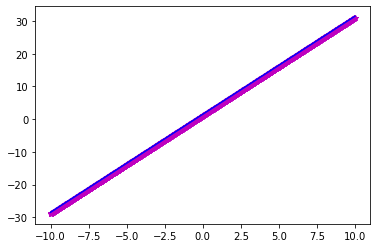

In [92]:
######################### data ###########################
x = np.linspace(-10,10,1000)
mu = np.random.rand(len(x)) #噪声点
y = 3*x+1+mu               #待拟合的数据
y_true = 3*x+1             #真实数据


###################### main code #########################
ones = np.ones((len(x),1))#生成单位向量
length = x.shape[0]       #获得向量的行数
x = x.reshape(length,1)   #统一shape
A = np.hstack((x,ones))   #拼接成有一列全为1的矩阵
b = y.reshape((len(x),1)) #统一shape

def leastSquarefit(A,b):  #最小二乘拟合的矩阵运算
    B = A.T @ b
    AA = np.linalg.inv(A.T @ A)
    ans = A @ AA @ B
    return ans

y_fit = leastSquarefit(A,b)
mse = mean_squared_error(y_fit,y_true)
print(mse)

##################### 结果可视化展示 #########################
plt.plot(x,y_true,color='m',linestyle='',marker='*')
plt.plot(x,y_fit,color='b') 
plt.show()

1.2167108977147485


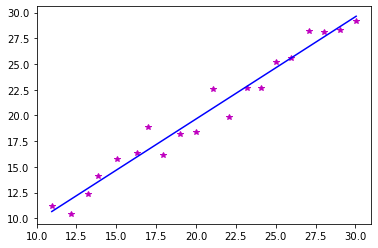

In [93]:
################################## 教材数据 ################################
x = np.array([10.95,12.14,13.22,13.87,15.06,16.30,17.01,17.93,19.01,20.01,
              21.04,22.10,23.17,24.07,25.00,25.95,27.10,28.01,29.06,30.05])
y = np.array([11.18,10.43,12.36,14.15,15.73,16.40,18.86,16.13,18.21,18.37,
              22.61,19.83,22.67,22.70,25.16,25.55,28.21,28.12,28.32,29.18])

###################### main code #########################
ones = np.ones((len(x),1))#生成单位向量
length = x.shape[0]       #获得向量的行数
x = x.reshape(length,1)   #统一shape
A = np.hstack((x,ones))   #拼接成有一列全为1的矩阵
b = y.reshape((len(x),1)) #统一shape

def leastSquarefit(A,b):  #最小二乘拟合的矩阵运算
    B = A.T @ b
    AA = np.linalg.inv(A.T @ A)
    ans = A @ AA @ B
    return ans

y_fit = leastSquarefit(A,b)
mse = mean_squared_error(y_fit,y)
print(mse)

##################### 结果可视化展示 #########################
plt.plot(x,y,color='m',linestyle='',marker='*')
plt.plot(x,y_fit,color='b') 
plt.show()

In [94]:
################################## 任意数据集数据 ################################

#读取比特币数据集
data = pd.read_csv('E:\数据集\比特币数据（天）\Byday.csv')
data.tail()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
1361,1.620000e+12,2021/5/8 0:00,BTC/USDT,57315.49,59500.00,56900.00,58862.05,69709.906030,4.079554e+09,2311378.0
1362,1.620000e+12,2021/5/9 0:00,BTC/USDT,58866.53,59300.00,56235.66,58240.84,69806.119910,4.043553e+09,2170139.0
1363,1.620000e+12,2021/5/10 0:00,BTC/USDT,58240.83,59500.00,53400.00,55816.14,89586.349250,5.131783e+09,2575419.0
1364,1.620000e+12,2021/5/11 0:00,BTC/USDT,55816.14,56862.43,54370.00,56670.02,64329.540550,3.583031e+09,1911480.0
1365,1.620000e+12,2021/5/12 0:00,BTC/USDT,56670.02,56704.83,56555.12,56650.96,145.325282,8.230297e+06,5679.0


0.00015229690213448707


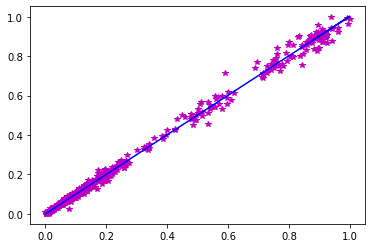

In [95]:
#######################  数据准备 #########################
x = np.array(data[['open']])
y = np.array(data[['close']])

##################### 数据归一化处理 ######################
x =(x - x.min())/(x.max() - x.min())
y =(y - y.min())/(y.max() - y.min())


###################### main code #########################
ones = np.ones((len(x),1))#生成单位向量
length = x.shape[0]       #获得向量的行数
x = x.reshape(length,1)   #统一shape
A = np.hstack((x,ones))   #拼接成有一列全为1的矩阵
b = y.reshape((len(x),1)) #统一shape

def leastSquarefit(A,b):  #最小二乘拟合的矩阵运算
    B = A.T @ b
    AA = np.linalg.inv(A.T @ A)
    ans = A @ AA @ B
    return ans


def MSE(y_true, y_fit):
    return np.sum((y_true - y_fit)**2)/length

y_fit = leastSquarefit(A,b)
mse = mean_squared_error(y_fit,y)
print(mse)

##################### 结果可视化展示 #########################
plt.plot(x,y,color='m',linestyle='',marker='*')
plt.plot(x,y_fit,color='b') 
plt.show()

### 实验总结<p>
    1.使用numpy分别实现了对三种数据的线性回归
    2.计算带bias的线性回归时，因为要生成有一列全为1的矩阵，需要首先生成一个单位向量后使用np.hstack()命令进行拼接

最小二乘法过程推导<p>
$\|A x-b\|_{2}^{2}=x^{T} A^{T} A x-b^{T} A x-x^{T} A^{T} b+b^{T} b$<p>
$\frac{\partial\|A x-b\|_{2}^{2}}{\partial x}=2 A^{T} A x-2 A^{T} b=0$<p>
$x=\left(A^{T} A\right)^{-1} A^{T} b$<p>